# CNN CIFAR10 dataset Classification

Tutorial: [codebasics](https://www.youtube.com/watch?v=7HPwo4wnJeA&ab_channel=codebasics)

## Import modules

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## Import datasets

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train.shape

(50000, 1)

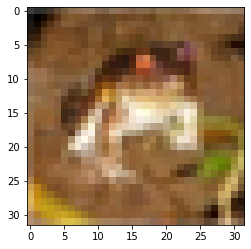

In [6]:
plt.imshow(X_train[0])

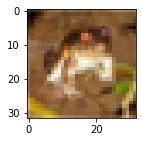

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [8]:
# https://www.cs.toronto.edu/~kriz/cifar.html

labels = arr = [
  "airplane",
  "automobile",
  "bird",
  "cat",
  "deer",
  "dog",
  "frog",
  "horse",
  "ship",
  "truck",
];


In [9]:
y_train[:5] 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
labels[6]

'frog'

In [12]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(labels[y[index]])

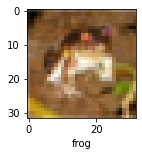

In [13]:
plot_sample(X_train, y_train, 0)

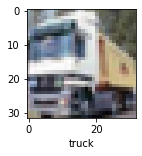

In [14]:
plot_sample(X_train, y_train, 1)

## Normalize the data

In [15]:
X_train = X_train / 255
X_test = X_test / 255

## ANN

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8105 - accuracy: 0.3569
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6240 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5410 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4825 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4315 - accuracy: 0.4955


In [18]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4567 - accuracy: 0.4861


[1.4567447900772095, 0.4860999882221222]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.59      0.55      1000
           1       0.53      0.70      0.60      1000
           2       0.35      0.36      0.36      1000
           3       0.40      0.24      0.30      1000
           4       0.44      0.40      0.42      1000
           5       0.52      0.25      0.34      1000
           6       0.39      0.77      0.52      1000
           7       0.69      0.42      0.52      1000
           8       0.56      0.68      0.62      1000
           9       0.63      0.45      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.47     10000
weighted avg       0.50      0.49      0.47     10000



## CNN


In [21]:
cnn = models.Sequential([
        # CNN
        layers.Conv2D(filters=32, kernel_size=(3,3), 
                      activation='relu', 
                      input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), 
                      activation='relu'),
        layers.MaxPooling2D((2,2)),

        # Dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
hist = cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4678 - accuracy: 0.4747
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1161 - accuracy: 0.6115
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9923 - accuracy: 0.6530
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9145 - accuracy: 0.6827
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8544 - accuracy: 0.7038
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7971 - accuracy: 0.7244
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7528 - accuracy: 0.7371
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7128 - accuracy: 0.7535
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6790 - accuracy: 0.7641
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.643

In [25]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1542 - accuracy: 0.6852


[1.1542102098464966, 0.6851999759674072]

## Predictions

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

we should convert the dimmension into 1

In [27]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

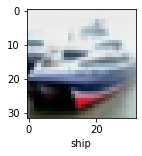

In [28]:
plot_sample(X_test, y_test, 1)

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.42410874e-06, 1.99095643e-06, 1.90275841e-05, 3.09145689e-01,
        6.31426519e-05, 6.89298213e-01, 4.46281512e-04, 2.63083098e-06,
        1.02052186e-03, 8.51505106e-08],
       [2.45146774e-04, 4.28441097e-04, 6.32189279e-09, 1.41756815e-10,
        2.40565228e-12, 5.75366740e-13, 1.15638377e-09, 8.03934989e-13,
        9.98826206e-01, 5.00241993e-04],
       [1.65136069e-01, 5.56918457e-02, 4.74909000e-04, 4.94047953e-03,
        4.00362071e-04, 1.59906282e-04, 1.40828633e-05, 6.72438473e-05,
        7.07560122e-01, 6.55549467e-02],
       [9.95577574e-01, 2.79357355e-05, 2.43113769e-04, 5.77400097e-05,
        1.87974336e-04, 1.02521184e-07, 8.65929167e-07, 2.77136701e-06,
        3.87146045e-03, 3.05416870e-05],
       [1.09901574e-12, 5.85640494e-11, 1.71124397e-04, 7.72255356e-04,
        6.70528531e-01, 6.88985074e-06, 3.28521252e-01, 3.25382039e-12,
        2.29079475e-08, 4.69626060e-10]], dtype=float32)

In [31]:
np.argmax(y_pred[0])

5

In [32]:
y_classess = [np.argmax(element) for element in y_pred]

In [33]:
y_classess[:5]

[5, 8, 8, 0, 4]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

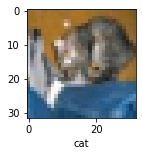

In [37]:
plot_sample(X_test, y_test, 0)

In [39]:
labels[y_classess[0]]

'dog'

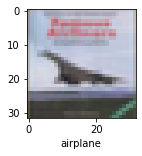

In [41]:
plot_sample(X_test, y_test, 3)

In [42]:
labels[y_classess[3]]

'airplane'

In [43]:
print("Classifciation Report: \n", classification_report(y_test, y_classess))

Classifciation Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.88      0.74      0.80      1000
           2       0.58      0.52      0.55      1000
           3       0.51      0.47      0.49      1000
           4       0.58      0.71      0.64      1000
           5       0.58      0.62      0.60      1000
           6       0.69      0.84      0.76      1000
           7       0.76      0.70      0.73      1000
           8       0.83      0.75      0.79      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

